<a href="https://colab.research.google.com/github/elainedias16/TCC/blob/main/Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#BBC News Dataset

# Reading the Dataset and Creating the Dataframe

In [2]:
import pandas as pd

id_file = '1m41gWGwnLYo0nAEOABnU_MH_SCQHWfjS'
url_file = 'https://drive.google.com/uc?id={}'.format(id_file)

def create_dataframe(path):
    columns=['genre', 'filename', 'title', 'content']
    df =  pd.read_table(
    path,
    header=None,
    names=columns,
    sep= '\t',
    engine= 'python'
    )
    return df


df = create_dataframe(url_file)
df = df.drop(0).reset_index(drop=True)

df.tail()

,genre,filename,title,content
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...
2224,tech,401.txt,Losing yourself in online gaming,"Online role playing games are time-consuming,..."


In [ ]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

import spacy
from spacy.lang.en.examples import sentences

!pip install unidecode
import unidecode
from nltk.stem.porter import PorterStemmer
!python -m spacy download en_core_web_sm


## Create dataset with less samples

In [41]:
import random

def create_balanced_small_df(df, genres, num):
  small_df_list = []
  for genre in genres:
    sample_rows = df.sample(num)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)

def create_imbalanced_small_df(df, genres, num_max):
  small_df_list = []
  for genre in genres:
    qtd = random.randint(1, num_max)
    sample_rows = df.sample(qtd)
    small_df_list.append(sample_rows)
  return pd.concat(small_df_list).reset_index(drop=True)


In [42]:
genres = genres = df['genre'].unique()
num_max = 50 # Max number of docs by genre in small df
num = 20 # Number of docs by genre in small df
# small_df = create_balanced_small_df(df, genres, num)
small_df = create_imbalanced_small_df(df, genres, num_max)

# Pre Processing

In [43]:
def remove_non_alphanumeric(text):
    words = ''
    for w in text:
        words += w if w.isalnum() else ' '
    return words

def remove_accents(text):
  return unidecode.unidecode(text)


def lowercasting(tokens):
  tokens = [w.lower() for w in tokens]
  return tokens

def remove_stop_words(tokens):
  stop_words = set(stopwords.words('english')) #List of stop words in english
  tokens = [token for token in tokens if token not in stop_words]
  return tokens


def stemming(tokens):
  porter = PorterStemmer()
  tokens = [porter.stem(token) for token in tokens]
  return tokens


def lemmanization(text):
    nlp = spacy.load("en_core_web_sm")    # Load English language model
    doc = nlp(text)   # Process the text using the Spacy NLP
    tokens = [token.lemma_ for token in doc]
    return tokens


def pre_processing_aux(text):
  words = remove_non_alphanumeric(text)
  words = remove_accents(words)
  tokens = word_tokenize(words)
  tokens = lowercasting(tokens)
  tokens = remove_stop_words(tokens)
  words = ' '.join(tokens)
  tokens = lemmanization(words)
  tokens = stemming(tokens)
  return ' '.join(tokens)


In [38]:
def pre_processing(df):
    df['content'] = df['content'].apply(pre_processing_aux)
    return df

###########################################################
# To prossegue with all dataset, put df on parameter
# To prossegue with small dataset, put small_df in paramter
############################################################

df = pre_processing(small_df)
df.tail()

,genre,filename,title,content
125,entertainment,104.txt,Glasgow hosts tsunami benefit gig,top name scottish music take part benefit conc...
126,politics,001.txt,Labour plans maternity pay rise,matern pay new mother rise 1 400 part new prop...
127,sport,399.txt,Farrell saga to drag on - Lindsay,wigan chairman mauric lindsay say expect quick...
128,entertainment,174.txt,X Factor show gets second series,tv talent show x factor return second seri rec...
129,sport,075.txt,Gardener wins double in Glasgow,britain jason garden enjoy doubl 60 m success ...


# Basic statistics analysis

##Documents number by class

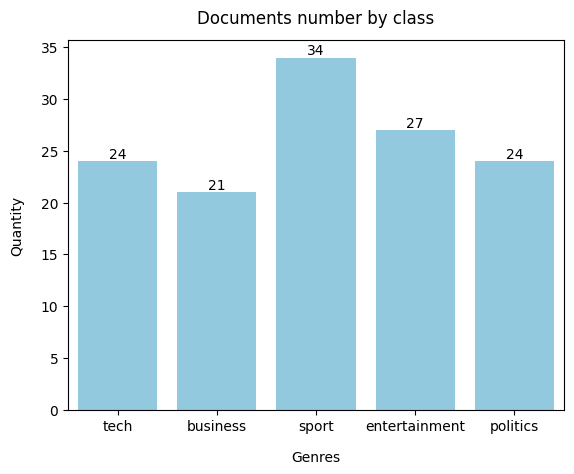

In [67]:
import matplotlib.pyplot as plt
import seaborn

genres = df['genre'].unique()

# def qtd_doc_genres():
#   qtd_genres = {}
#   for genre in genres:
#       count = df[df['genre'] == genre]['genre'].count()
#       qtd = { genre : count}
#       qtd_genres.update(qtd)
#   return qtd_genres


# def plot_doc_by_class():
#   qtd_genres = qtd_doc_genres()
#   qtd = qtd_genres.values()

#   plt.title('Documents number by class', pad=15)
#   plt.xlabel('Genres', labelpad=15)
#   plt.ylabel('Quantity', labelpad=15)
#   bars = plt.bar(genres , qtd, color='skyblue')
#   plt.tight_layout()

#   #Add number above bars
#   for bar in bars:
#       height = bar.get_height()
#       plt.text(bar.get_x() + bar.get_width()/2.0, height, str(height), ha='center', va='bottom')


#   plt.show()
#   print(qtd_genres)


# plot_doc_by_class()

def plot_doc_by_class(genres):
  ax = sns.countplot(x = 'genre', data = df , color='skyblue')
  plt.title('Documents number by class', pad=12)
  plt.xlabel('Genres', labelpad=12)
  plt.ylabel('Quantity', labelpad=12)

  bars = ax.patches
  for bar in bars:
        height = int(bar.get_height())
        plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom')
  plt.show()


plot_doc_by_class(genres)

#Top 30 most frequent words

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn

def get_genre_content(df, genre):
  content = df.loc[df['genre'] == genre, 'content'].str.cat(sep=' ')
  return content

#fazer for
content_business = get_genre_content(df, 'business')
content_entertainment = get_genre_content(df, 'entertainment')
content_politics = get_genre_content(df, 'politics')
content_sport = get_genre_content(df, 'sport')
content_tech = get_genre_content(df, 'tech')
content_all = content_business + ' ' + content_entertainment + ' ' + content_politics + ' ' + content_sport + ' ' + content_tech

count_business = Counter(content_business.split())
count_entertainment = Counter(content_entertainment.split())
count_politics = Counter(content_politics.split())
count_sport = Counter(content_sport.split())
count_tech = Counter(content_tech.split())
count_all = Counter(content_all.split())

def get_top_n_words(top_n, count_words):
    most_common_words = {}
    for word, count in count_words.most_common(top_n):
        most_common_words[word] = count
    return most_common_words

top_n = 30
common_words_business = get_top_n_words(top_n, count_business)
common_words_entertainment = get_top_n_words(top_n, count_entertainment)
common_words_politics = get_top_n_words(top_n, count_politics)
common_words_sport = get_top_n_words(top_n, count_sport)
common_words_tech = get_top_n_words(top_n, count_tech)
common_words_all = get_top_n_words(top_n, count_all)


def plot_most_common_words(top_n, count_words, title, fontsize):
    top_words = list(count_words.keys())
    top_counts = list(count_words.values())

    plt.figure(figsize=(20, 8))
    # bars = plt.barh(top_words, top_counts, color='skyblue')
    plt.barh(top_words, top_counts, color='skyblue')
    plt.xlabel('Tokens', labelpad=15)
    plt.ylabel('Frequency', labelpad=15)
    plt.title(title, pad=15)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    # for bar in bars:
    #     height = bar.get_height() #Capture qtd of each bar
    #     plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=fontsize)

    plt.show()

fontsize=10

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Horizontal graphic
def plot_h_most_common_words(top_n, count_words, title, fontsize):
  df_counts = pd.DataFrame(list(count_words.items()), columns=['Tokens', 'Quantity'])
  df_counts = df_counts.sort_values("Quantity", ascending=False)
  plt.subplots(figsize=(7, 9))
  sns.set_theme(style="whitegrid", palette="pastel")
  # ax = sns.barplot(x='Quantity', y='Tokens', data=df_counts)
  sns.barplot(x='Quantity', y='Tokens', data=df_counts)

  # for index, value in enumerate(df_counts['Quantity']):
  #   ax.text(value, index, str(value), ha='left', va='center')
  plt.xlabel('Quantity', labelpad=15)
  plt.ylabel('Tokens', labelpad=15)
  plt.title(title, pad=15)
  plt.show()

##Top 30 most frequent tokens in business

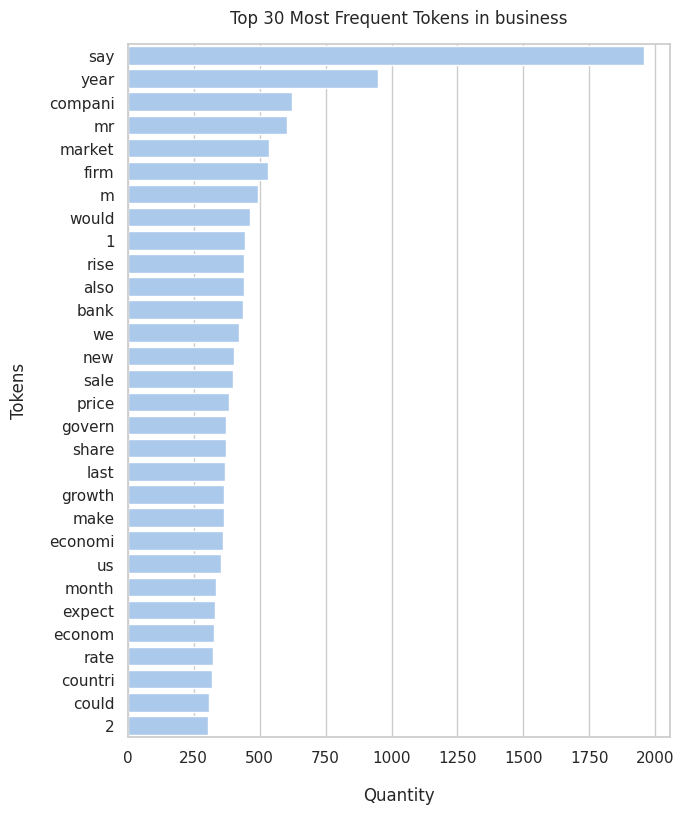

{'say': 1959, 'year': 950, 'compani': 624, 'mr': 603, 'market': 537, 'firm': 532, 'm': 492, 'would': 464, '1': 443, 'rise': 441, 'also': 440, 'bank': 436, 'we': 420, 'new': 402, 'sale': 399, 'price': 383, 'govern': 373, 'share': 372, 'last': 369, 'growth': 365, 'make': 363, 'economi': 361, 'us': 352, 'month': 335, 'expect': 332, 'econom': 327, 'rate': 322, 'countri': 321, 'could': 309, '2': 304}


In [ ]:
title_business = 'Top {} Most Frequent Tokens in business'.format(top_n)
plot_most_common_words_x(top_n, common_words_business, title_business, fontsize)
print(common_words_business)

##Top 30 most frequent tokens in entertainment




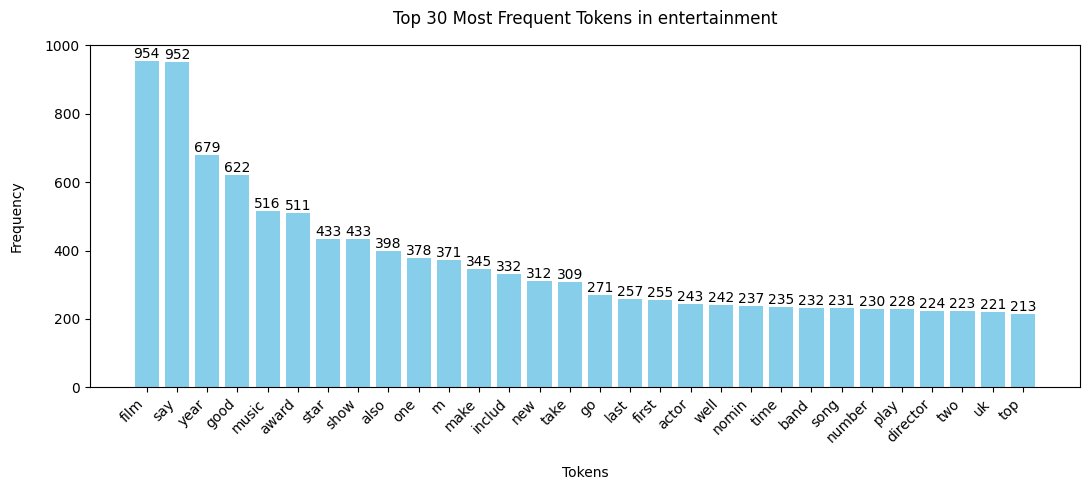

{'film': 954, 'say': 952, 'year': 679, 'good': 622, 'music': 516, 'award': 511, 'star': 433, 'show': 433, 'also': 398, 'one': 378, 'm': 371, 'make': 345, 'includ': 332, 'new': 312, 'take': 309, 'go': 271, 'last': 257, 'first': 255, 'actor': 243, 'well': 242, 'nomin': 237, 'time': 235, 'band': 232, 'song': 231, 'number': 230, 'play': 228, 'director': 224, 'two': 223, 'uk': 221, 'top': 213}


In [ ]:
title_entertainment = 'Top {} Most Frequent Tokens in entertainment'.format(top_n)
plot_most_common_words(top_n, common_words_entertainment, title_entertainment, fontsize)
print(common_words_entertainment)

##Top 30 most frequent tokens in politics

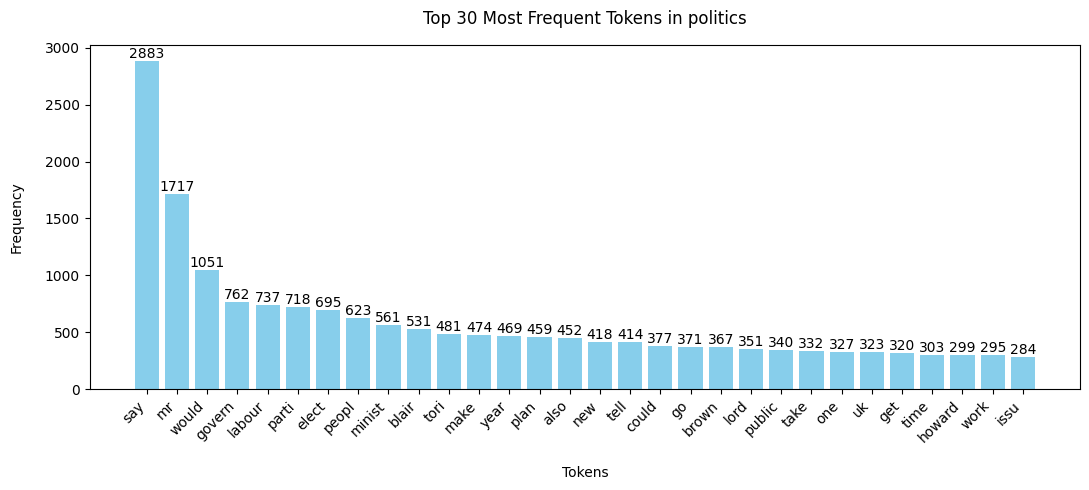

{'say': 2883, 'mr': 1717, 'would': 1051, 'govern': 762, 'labour': 737, 'parti': 718, 'elect': 695, 'peopl': 623, 'minist': 561, 'blair': 531, 'tori': 481, 'make': 474, 'year': 469, 'plan': 459, 'also': 452, 'new': 418, 'tell': 414, 'could': 377, 'go': 371, 'brown': 367, 'lord': 351, 'public': 340, 'take': 332, 'one': 327, 'uk': 323, 'get': 320, 'time': 303, 'howard': 299, 'work': 295, 'issu': 284}


In [ ]:
title_politics = 'Top {} Most Frequent Tokens in politics'.format(top_n)
plot_most_common_words(top_n, common_words_politics, title_politics, fontsize)
print(common_words_politics)

##Top 30 most frequent tokens in sport

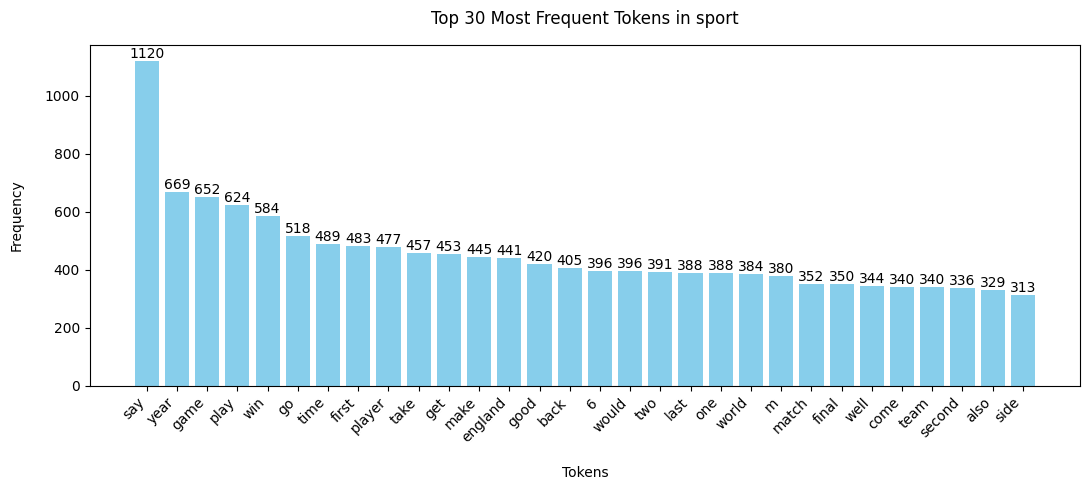

{'say': 1120, 'year': 669, 'game': 652, 'play': 624, 'win': 584, 'go': 518, 'time': 489, 'first': 483, 'player': 477, 'take': 457, 'get': 453, 'make': 445, 'england': 441, 'good': 420, 'back': 405, '6': 396, 'would': 396, 'two': 391, 'last': 388, 'one': 388, 'world': 384, 'm': 380, 'match': 352, 'final': 350, 'well': 344, 'come': 340, 'team': 340, 'second': 336, 'also': 329, 'side': 313}


In [ ]:
title_sport = 'Top {} Most Frequent Tokens in sport'.format(top_n)
plot_most_common_words(top_n, common_words_sport, title_sport, fontsize)
print(common_words_sport)

##Top 30 most frequent tokens in tech

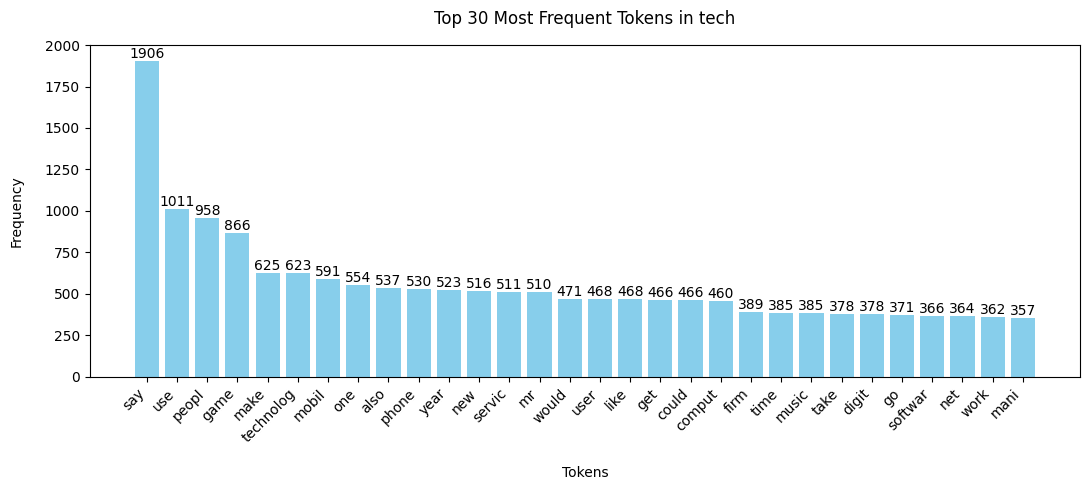

{'say': 1906, 'use': 1011, 'peopl': 958, 'game': 866, 'make': 625, 'technolog': 623, 'mobil': 591, 'one': 554, 'also': 537, 'phone': 530, 'year': 523, 'new': 516, 'servic': 511, 'mr': 510, 'would': 471, 'user': 468, 'like': 468, 'get': 466, 'could': 466, 'comput': 460, 'firm': 389, 'time': 385, 'music': 385, 'take': 378, 'digit': 378, 'go': 371, 'softwar': 366, 'net': 364, 'work': 362, 'mani': 357}


In [ ]:
title_tech = 'Top {} Most Frequent Tokens in tech'.format(top_n)
plot_most_common_words(top_n, common_words_tech, title_tech, fontsize)
print(common_words_tech)

##Top 30 most frequent tokens in all dataset

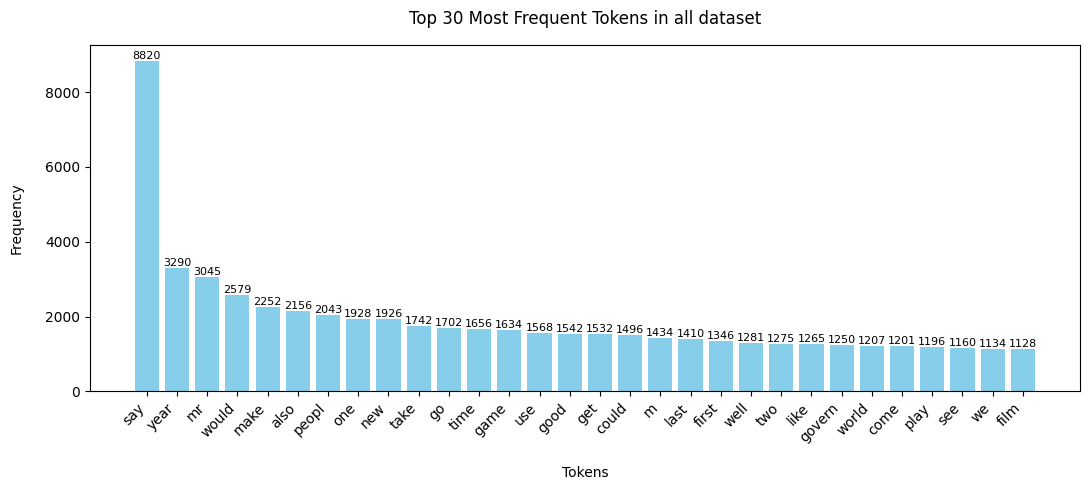

{'say': 8820, 'year': 3290, 'mr': 3045, 'would': 2579, 'make': 2252, 'also': 2156, 'peopl': 2043, 'one': 1928, 'new': 1926, 'take': 1742, 'go': 1702, 'time': 1656, 'game': 1634, 'use': 1568, 'good': 1542, 'get': 1532, 'could': 1496, 'm': 1434, 'last': 1410, 'first': 1346, 'well': 1281, 'two': 1275, 'like': 1265, 'govern': 1250, 'world': 1207, 'come': 1201, 'play': 1196, 'see': 1160, 'we': 1134, 'film': 1128}


In [ ]:
fontsize=8
title_all = 'Top {} Most Frequent Tokens in all dataset'.format(top_n)
plot_most_common_words(top_n, common_words_all, title_all, fontsize)
print(common_words_all)

#Frequency of class by word

In [ ]:
import random

count_genres = {
  'business': count_business,
  'entertainment' : count_entertainment,
  'politics' : count_politics,
  'sport' : count_sport,
  'tech' : count_tech
}


#Choose 10 random tokens in all content of news
content_all_split = content_all.split()
random_words = random.sample(content_all_split, 3)
print("random words: ", random_words)

def get_counts_per_genre(word, count_genres):
    counts_per_genre = {}  #Dictionary to store word count in each class
    for genre, content_counter in count_genres.items():
        if word in content_counter:
            counts_per_genre[genre] = content_counter[word]  # Adds the word count in the class to the dictionary
    return counts_per_genre


def get_frequency_class_by_word(selected_words, count_genres):
    dict_frequency = {}
    for word in selected_words:
        dict_frequency[word] = get_counts_per_genre(word, count_genres)
    return dict_frequency


dict_frequency = get_frequency_class_by_word(random_words, count_genres)
print(dict_frequency)

random words:  ['pop', 'video', 'look']
{'pop': {'entertainment': 104, 'politics': 2, 'sport': 2, 'tech': 17}, 'video': {'business': 15, 'entertainment': 41, 'politics': 10, 'sport': 15, 'tech': 288}, 'look': {'business': 127, 'entertainment': 72, 'politics': 125, 'sport': 225, 'tech': 231}}


## Frequency of words by documents

In [ ]:
from collections import Counter

def get_frequency(df):
    frequency = {}
    for index, row in df.iterrows():
        filename = row['filename']
        word_counts = dict(Counter(row['content'].split()))
        if filename not in frequency:
          frequency[filename] = word_counts
    return frequency



frequency = get_frequency(df)
print(frequency)


{'001.txt': {'quarterli': 1, 'profit': 9, 'we': 1, 'media': 1, 'giant': 1, 'timewarn': 7, 'jump': 1, '76': 1, '1': 1, '13bn': 1, '600': 1, 'm': 5, 'three': 2, 'month': 1, 'decemb': 1, '639': 1, 'year': 4, 'earli': 2, 'firm': 1, 'one': 2, 'big': 1, 'investor': 1, 'googl': 2, 'benefit': 1, 'sale': 4, 'high': 4, 'speed': 2, 'internet': 4, 'connect': 1, 'advert': 1, 'say': 5, 'fourth': 3, 'quarter': 4, 'rise': 2, '2': 1, '11': 1, '1bn': 1, '10': 1, '9bn': 1, 'buoy': 1, 'gain': 1, 'offset': 1, 'dip': 1, 'warner': 3, 'bro': 1, 'less': 1, 'user': 1, 'aol': 7, 'time': 2, 'friday': 1, 'own': 1, '8': 2, 'search': 1, 'engin': 1, 'busi': 1, 'mix': 1, 'fortun': 1, 'lose': 1, '464': 1, '000': 1, 'subscrib': 2, 'lower': 1, 'preced': 1, 'howev': 1, 'compani': 2, 'underli': 1, 'except': 1, 'item': 1, 'back': 1, 'strong': 2, 'advertis': 2, 'revenu': 4, 'hope': 1, 'increas': 1, 'offer': 2, 'onlin': 1, 'servic': 1, 'free': 1, 'custom': 2, 'tri': 1, 'sign': 1, 'exist': 1, 'broadband': 1, 'also': 2, 'restat

In [ ]:
df.head()

,genre,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,quarterli profit we media giant timewarn jump ...
1,business,002.txt,Dollar gains on Greenspan speech,dollar hit high level euro almost three month ...
2,business,003.txt,Yukos unit buyer faces loan claim,owner embattl russian oil giant yuko ask buyer...
3,business,004.txt,High fuel prices hit BA's profits,british airway blame high fuel price 40 drop p...
4,business,005.txt,Pernod takeover talk lifts Domecq,share uk drink food firm alli domecq rise spec...


In [ ]:
content_line = df['content'].iloc[0]
content_line

# Frequency of documents by words

In [ ]:
######fix it :::::::::::::::::::::

In [ ]:
def get_counts_by_doc(df, words):
  dict_f = {}
  for word in content_all_split:
    counts_by_doc = {word : {}}
    for index, row in df.iterrows():
      filename = row['filename']  # Nome do documento
      word_doc_counts = dict(Counter(row['content'].split()))
      if word in word_doc_counts.items():
        counts_by_doc[filename] = word_doc_counts[word]
      else:
        counts_by_doc[filename] = 0
    dict_f.update(counts_by_doc)
  return dict_f


doc_by_word = get_counts_by_doc(df, content_all_split)